In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd

from astropy.table import QTable
from scipy.interpolate import interp1d

In [2]:
#! cat /home/gabriele/Documents/fermiGBM/light-curve-GBM-sampler/Archive_Light_Curve/GRB120323507_Sum_n0_n3_b0.dat

In [3]:
filename = "/home/gabriele/Documents/fermiGBM/light-curve-GBM-sampler/Archive_Light_Curve/GRB120323507_Sum_n0_n3_b0.dat"

Light_curve = pd.read_table(filename,
                            sep=" ",
                            names = ["DP","time","counts"],
                            skiprows=6,
                            skipfooter=1,
                            engine ='python',
                            comment = '#',
                            dtype = {"DP":'str',"time":'float',"counts":'float'}
                           )
Light_curve = Light_curve.drop(labels=["DP"], axis=1)

# Print
Light_curve


,time,counts
0,0.00000,3.0
1,0.00384,0.0
2,0.00768,0.0
3,0.01152,2.0
4,0.01536,0.0
...,...,...
246,0.94464,0.0
247,0.94848,3.0
248,0.95232,2.0
249,0.95616,0.0


In [61]:
# Interpolation to get finer resolution
f = interp1d(Light_curve['time'],
             Light_curve['counts'],
             bounds_error=False,
             fill_value=(0.0,0.0)
            )

Time_resolution = Light_curve['time'][1]-Light_curve['time'][0]
print(f"Resolution: {Time_resolution} s.")
pad_width = int(1 / (Time_resolution/2.0) ) # Add 1s extra to dx and sx

times = Light_curve['time'].to_numpy()
times_hires = np.arange(-pad_width, 2.0*len(times)+pad_width)*(Time_resolution/2.0)
curve_hires = f(times_hires)


Resolution: 0.00384 s.


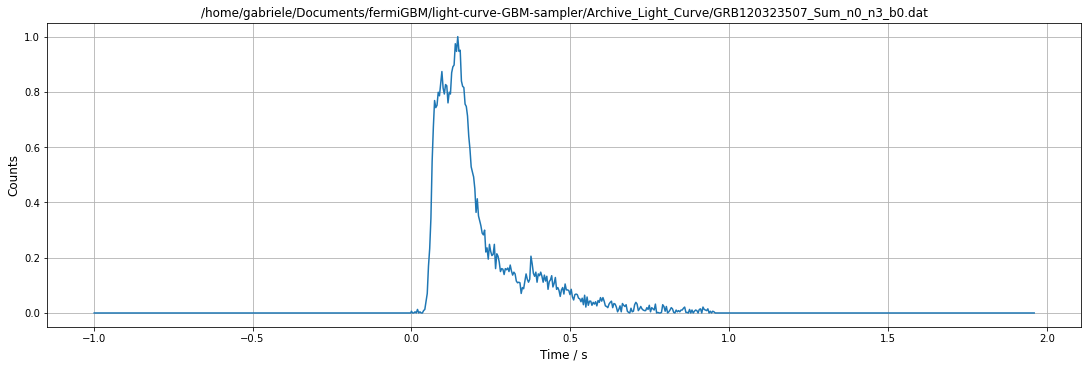

In [66]:
fig, ax = plt.subplots(1, figsize=(15,5), constrained_layout=True)

#ax.step(Light_curve['time'],Light_curve['counts'], where='mid')
#ax.plot(Light_curve['time'],Light_curve['counts'])
#ax.step(times_hires, curve_hires, where='mid')
ax.plot(times_hires, curve_hires/np.max(curve_hires))
ax.set_xlabel("Time / s", fontsize='large')
ax.set_ylabel("Counts", fontsize ='large')
ax.set_title(filename, fontsize='large')
#ax.set_xticks(np.linspace(Light_curve['time'].iloc[0],Light_curve['time'].iloc[-1], 10))
ax.grid()

In [67]:
# Save high resolution Light Curve

t = QTable(meta={'curve':"/home/gabriele/Documents/fermiGBM/light-curve-GBM-sampler/Archive_Light_Curve/GRB120323507_Sum_n0_n3_b0.dat"
                }
          )
t['time'] = times_hires * u.s
t['counts']= curve_hires
t['norm'] = curve_hires / np.max(curve_hires)

# Export
Output_Directory = "/home/gabriele/Documents/gammapy/LCsim/archives/"
Output_Name = "GRB120323507_Sum_n0_n3_b0.dat.fits"
t.write(Output_Directory+Output_Name, format = 'fits', overwrite = True)

